In [1]:
# -*- coding: utf-8 -*-

In [2]:
# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# import external modules
import numpy as np
import matplotlib.pyplot as plt

# import internal modules
from proj1_helpers import load_csv_data 
from implementations import *

# Load Data

In [3]:
y, input_data, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

In [4]:
np.shape(input_data)

(250000, 30)

# Process the Counting -999

In [6]:
nine_count = []

for i in range(0, np.shape(input_data)[1],1):
    nine_count.append(np.shape(np.where((input_data.T)[i]==-999))[1])

print(nine_count)

[38114, 0, 0, 0, 177457, 177457, 177457, 0, 0, 0, 0, 0, 177457, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 99913, 99913, 99913, 177457, 177457, 177457, 0]


# Removal of the -999 lines

In [7]:
print(np.where((input_data.T)[:]==-999))

X_no_999 = np.delete(input_data, np.where((input_data.T)[:]==-999), axis=0)
y_no_999 = np.delete(y, np.where((input_data.T)[:]==-999), axis=0)

np.shape(X_no_999)
np.shape(y_no_999)


(array([ 0,  0,  0, ..., 28, 28, 28], dtype=int64), array([     2,     10,     14, ..., 249997, 249998, 249999], dtype=int64))


(68109,)

# Plotting distributions vs. log-distributions

Problems: 
-negative numbers cannot be logged, for now i did abs but it's not fair.
-zero can't be logged, i added one.

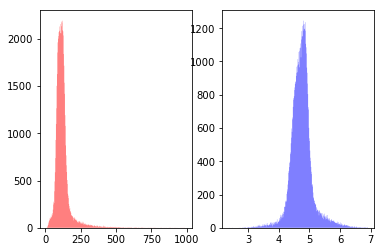

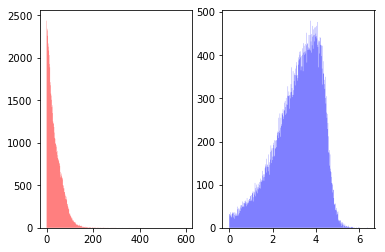

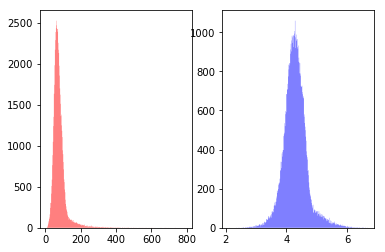

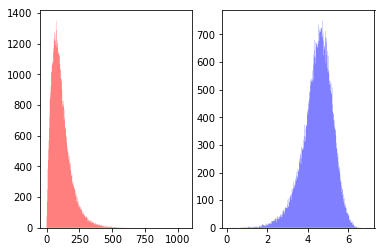

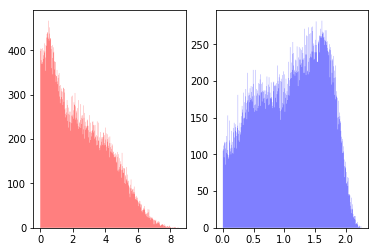

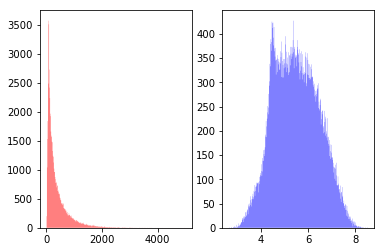

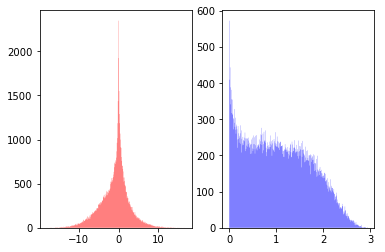

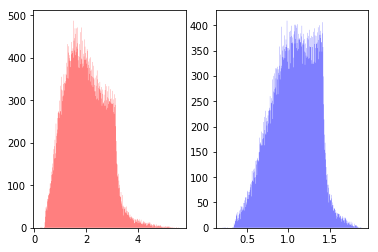

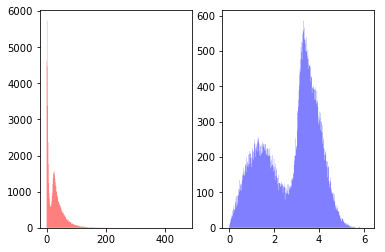

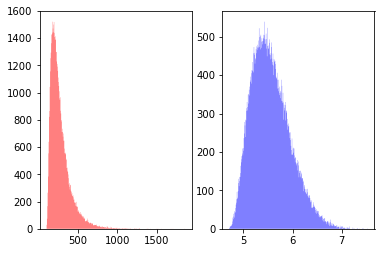

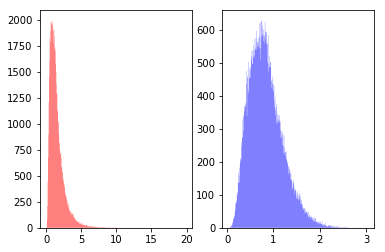

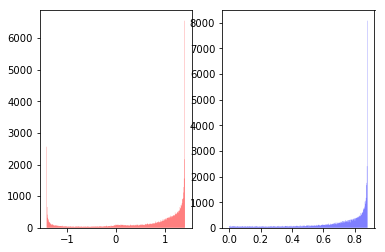

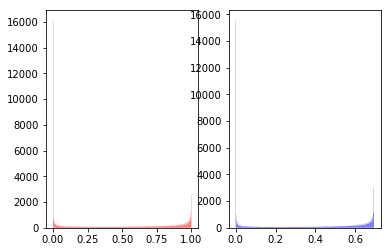

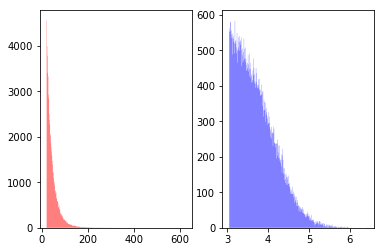

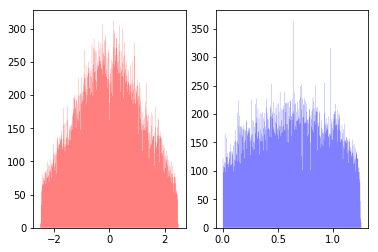

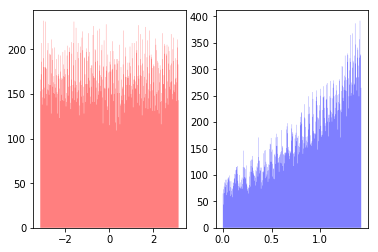

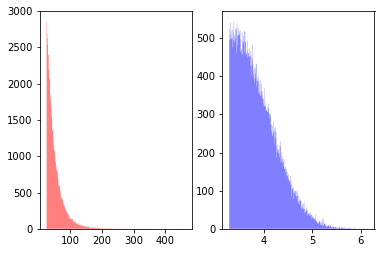

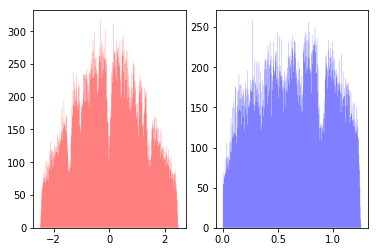

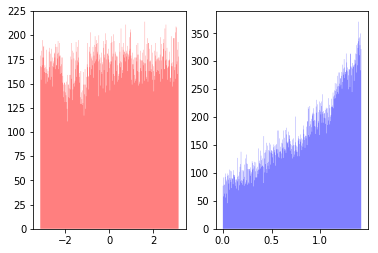

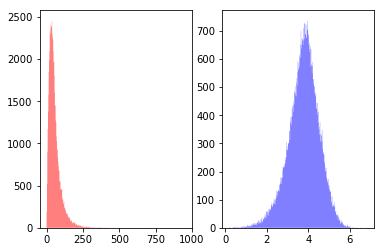

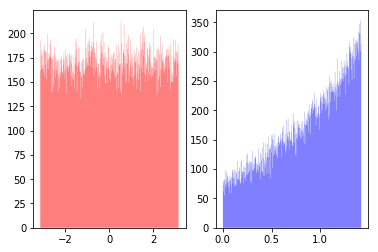

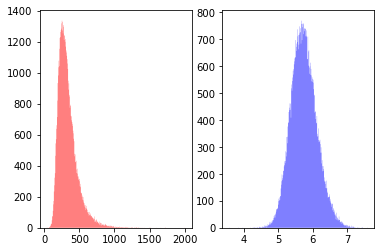

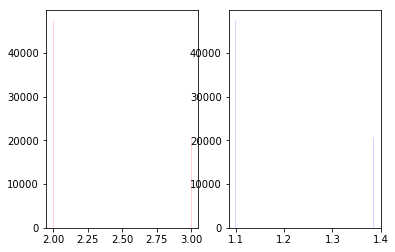

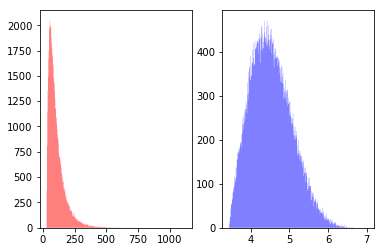

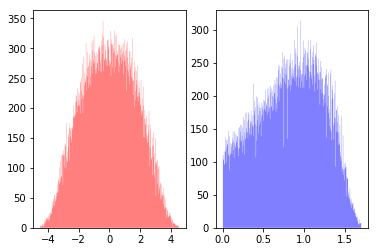

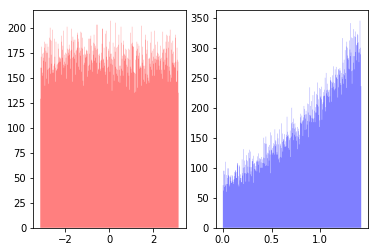

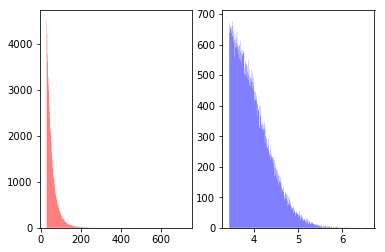

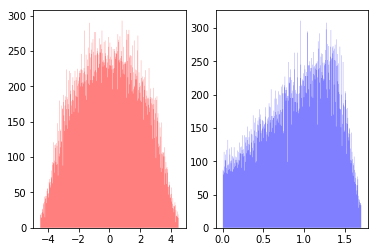

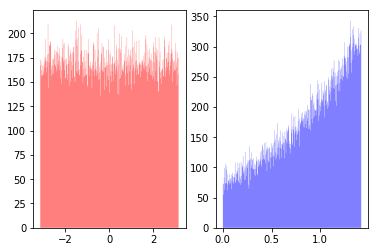

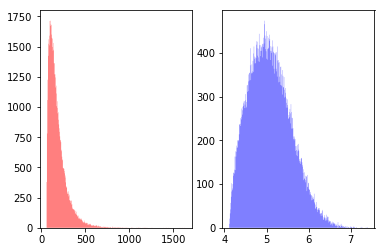

In [7]:
for i in range(0, np.shape(input_data)[1],1):
    plt.subplot(121)
    plt.hist([(X_no_999.T)[i]], bins=400, log=False,color='r', alpha=0.5,histtype='stepfilled')
    plt.subplot(122)
    plt.hist([np.log(1+np.abs(X_no_999.T)[i])], bins=400, log=False,color='b', alpha=0.5,histtype='stepfilled')
    plt.show()

# Separate PRI and DER in the input data

In [8]:
# primitive data
x_pri = X_no_999[:,:13]

# derived features from primitive data
x_der = X_no_999[:,13:]

print("all: ", X_no_999.shape)
print("der: ",x_pri.shape)
print("pri: ",x_der.shape)
print("labels: ",y_no_999.shape)

all:  (68109, 30)
der:  (68109, 13)
pri:  (68109, 17)
labels:  (68109,)


# Plotting data points in feature spaces

In [9]:
def plotInFeatureSpace(samples, labels, ind1, ind2, featureNames):
    
    # extract feature 1 and feature 2 at index 'ind1' and 'ind2' in 'samples'
    F1 = samples[:, ind1]
    F2 = samples[:, ind2]
    
    # get background event in F1 and F2 (the label in 'labels' is -1)
    ind_background = np.where(labels == -1)
    F1_background = F1[ind_background]
    F2_background = F2[ind_background]
    
    # get signal event in F1 and F2 (the label in 'labels' is +1)
    ind_signal = np.where(labels == 1)
    F1_signal = F1[ind_signal]
    F2_signal = F2[ind_signal]

    # plot background
    plt.subplot(121)
    plt.plot(F1_background, F2_background, 'o', color='blue')
    plt.plot(F1_signal, F2_signal, '*', color='red')
    plt.legend(("background", "signal"))
    plt.xlabel(featureNames[ind1])
    plt.ylabel(featureNames[ind2])
    
    # plot signal (higgs boson signature)
    plt.subplot(122)
    plt.plot(F1_signal, F2_signal, '*', color='red')
    plt.plot(F1_background, F2_background, 'o', color='blue')
    plt.legend(("signal", "background"))
    plt.xlabel(featureNames[ind1])
    plt.ylabel(featureNames[ind2])
    
    plt.show()


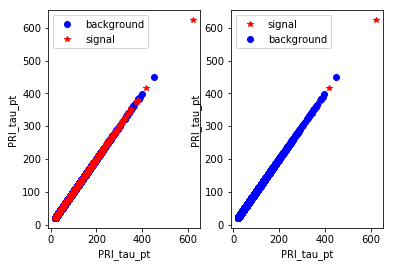

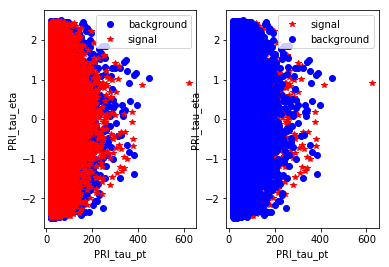

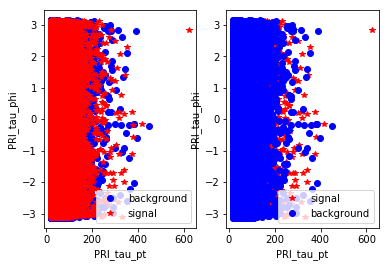

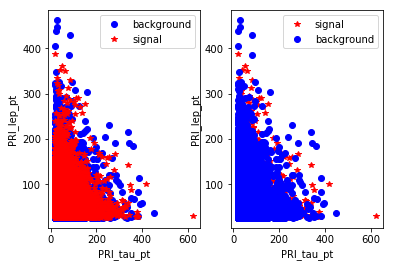

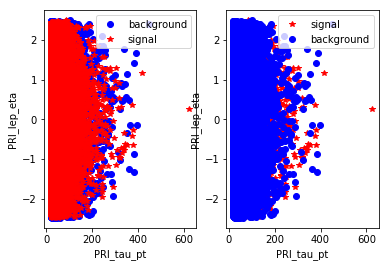

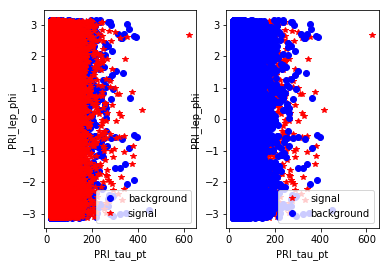

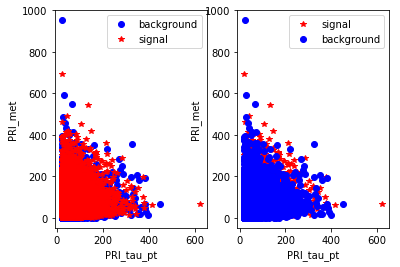

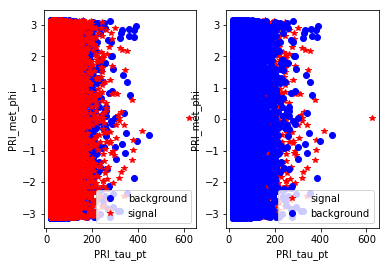

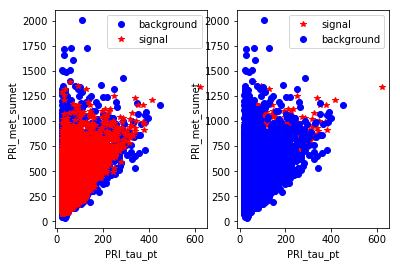

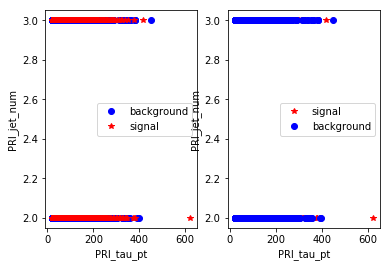

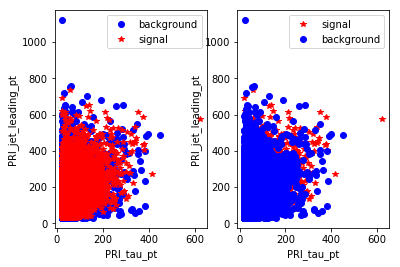

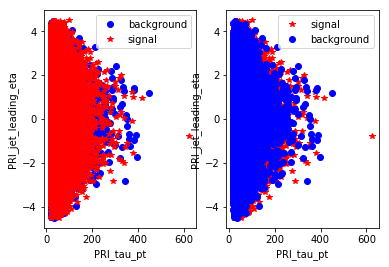

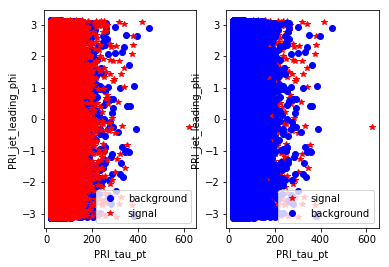

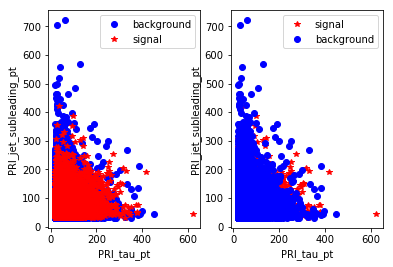

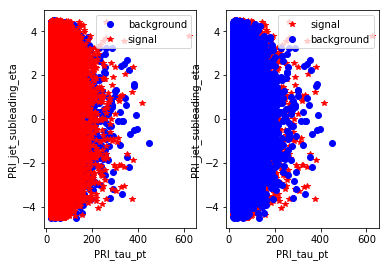

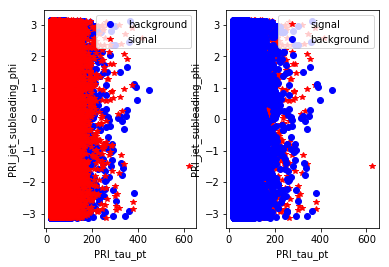

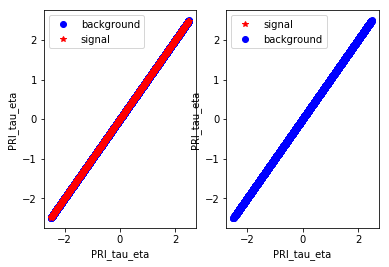

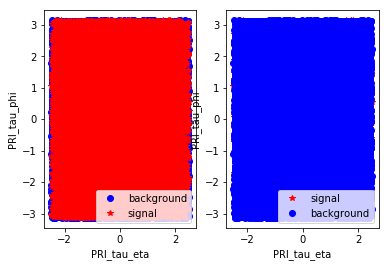

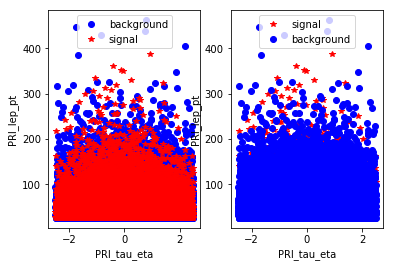

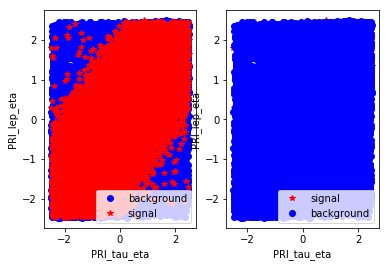

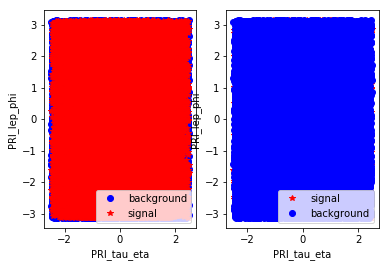

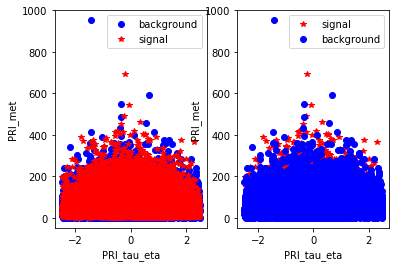

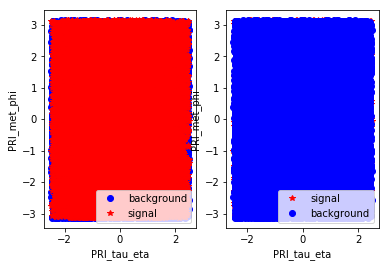

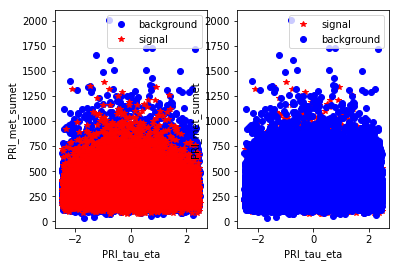

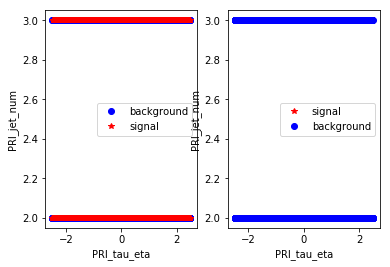

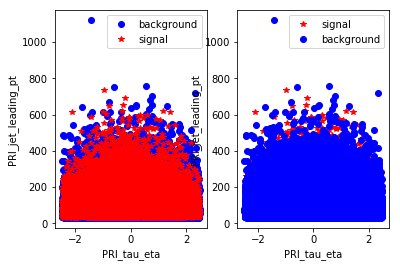

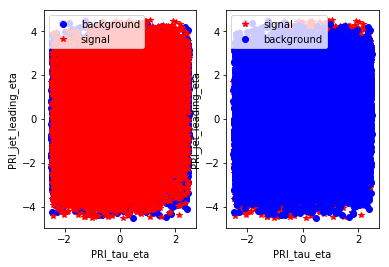

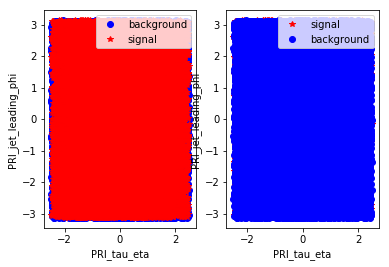

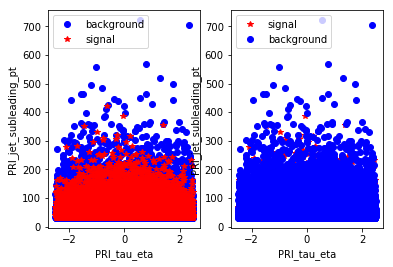

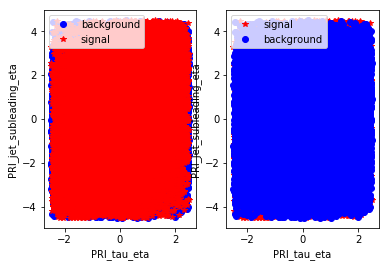

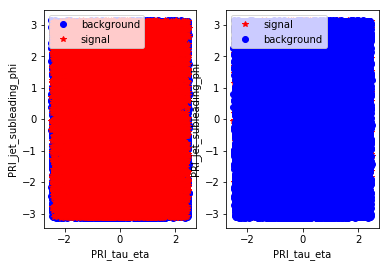

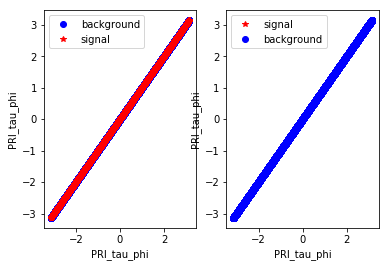

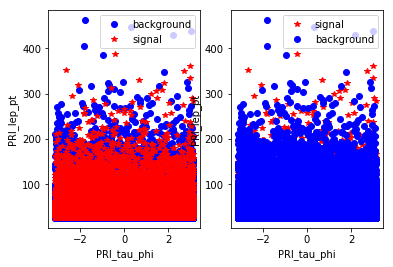

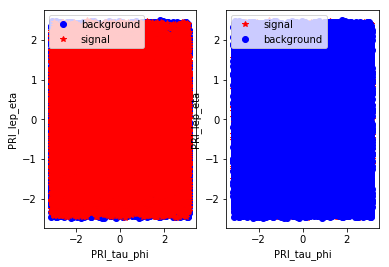

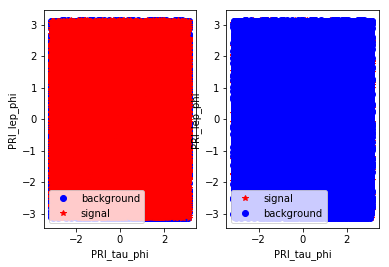

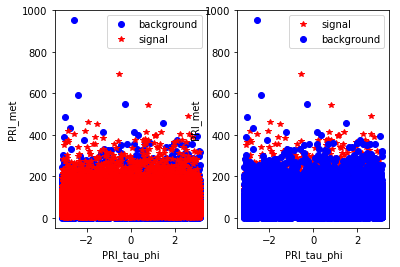

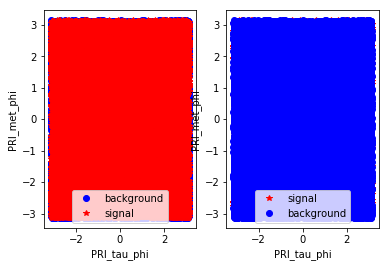

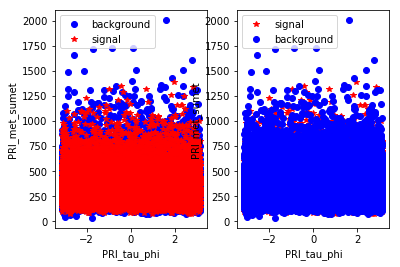

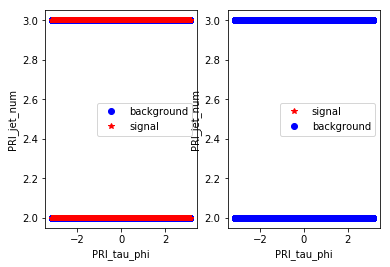

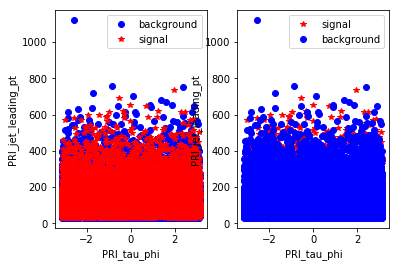

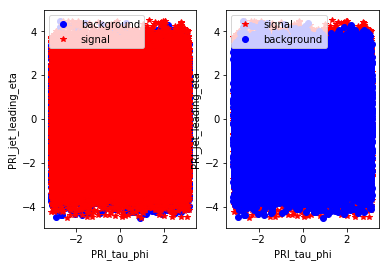

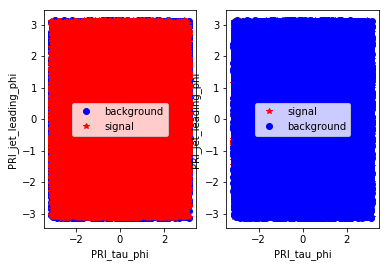

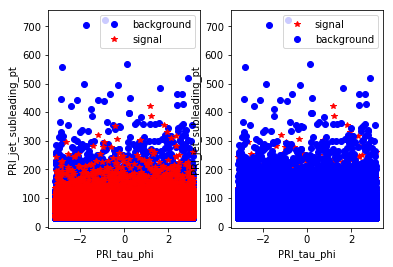

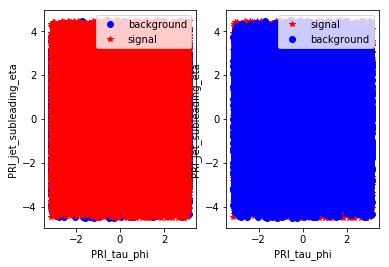

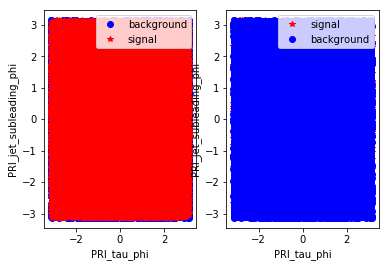

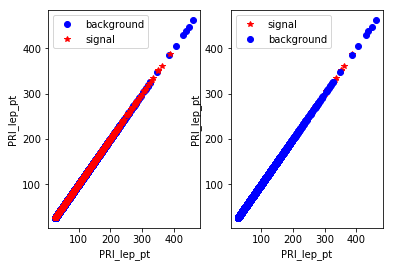

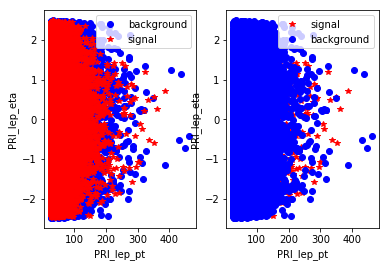

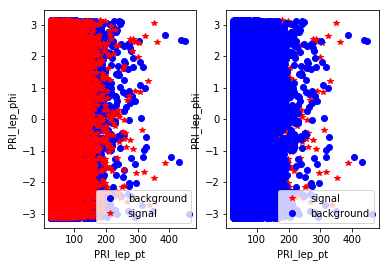

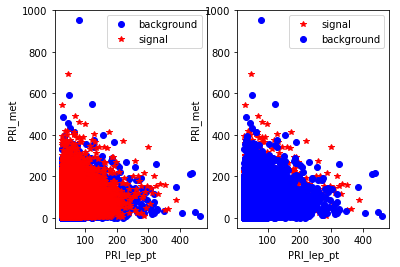

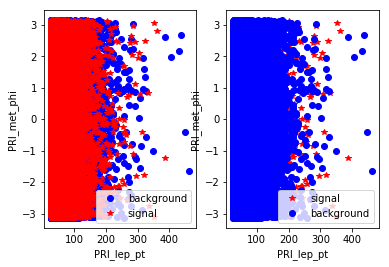

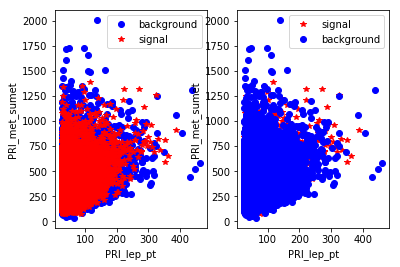

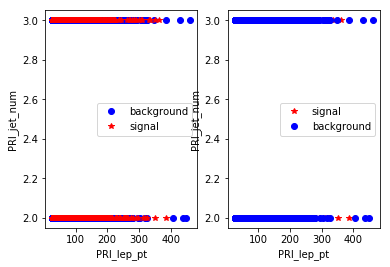

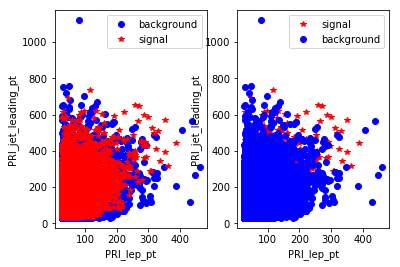

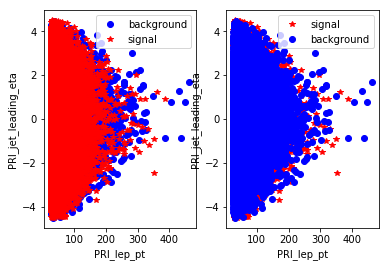

In [ ]:
# read the names of the features in the dataset 'train.csv'
featureNames = np.genfromtxt(my_path + r'\data\train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]
DerNames = featureNames[13:]

# plot all DER feature spaces after removing the 999
for i in np.arange(x_der.shape[1]-1):
    for j in range(i,x_der.shape[1]-1):
        plotInFeatureSpace(x_der, y_no_999, i, j, DerNames)

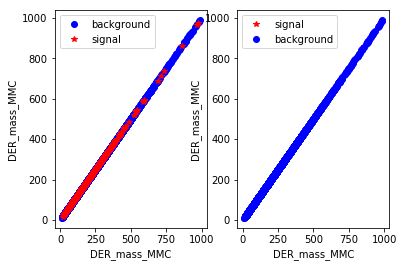

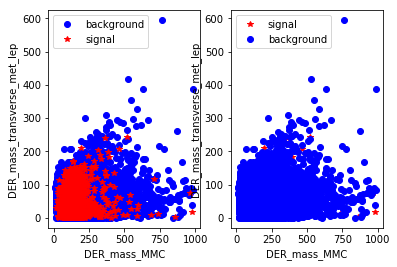

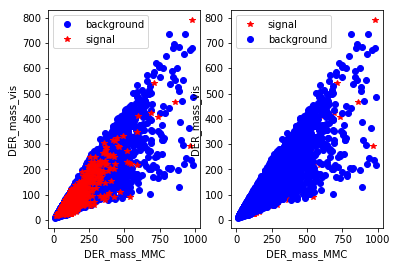

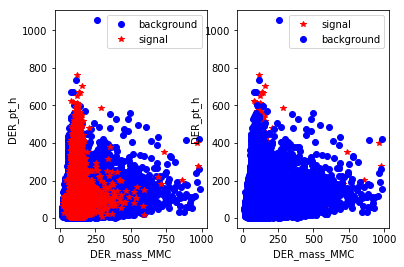

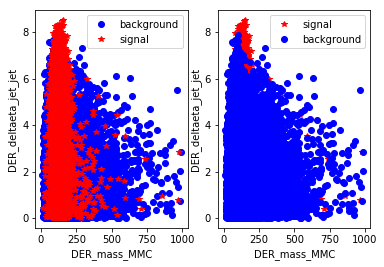

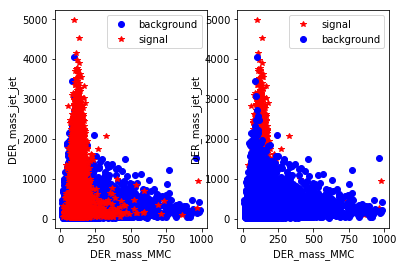

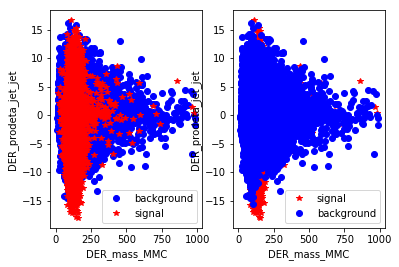

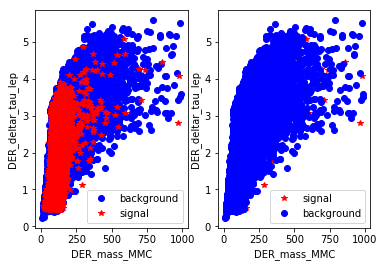

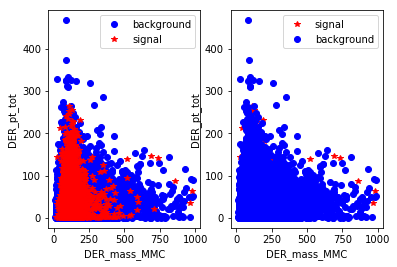

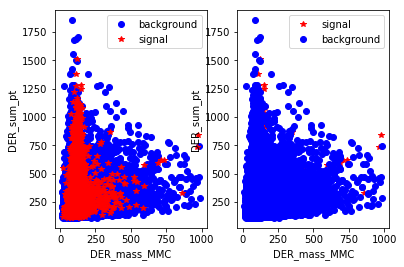

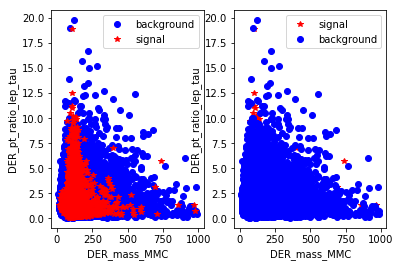

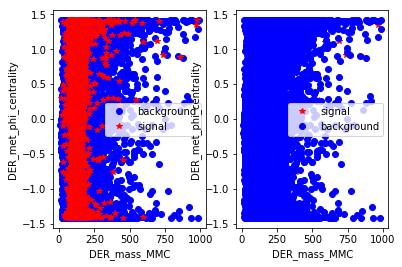

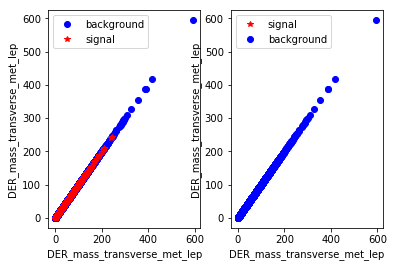

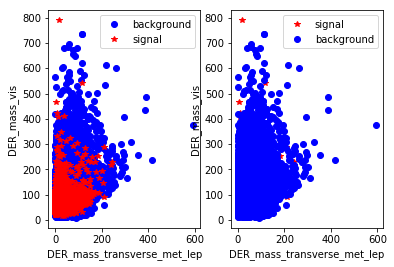

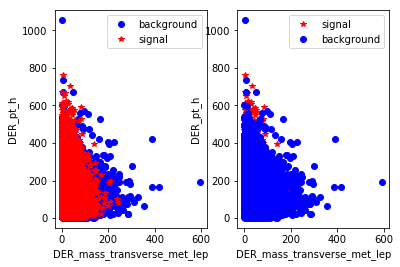

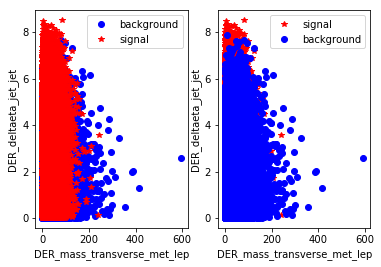

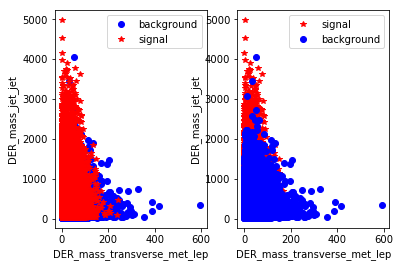

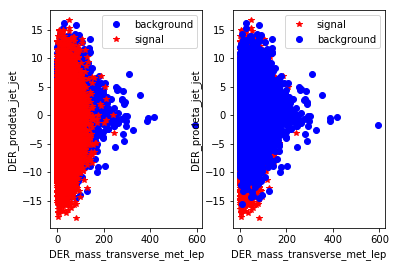

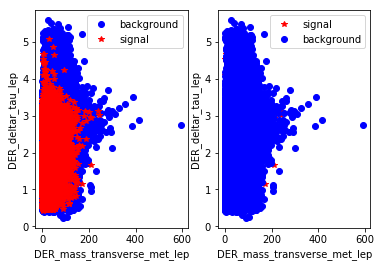

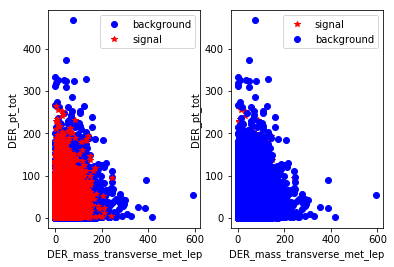

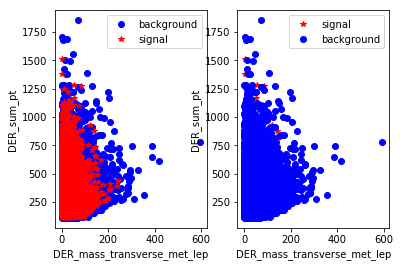

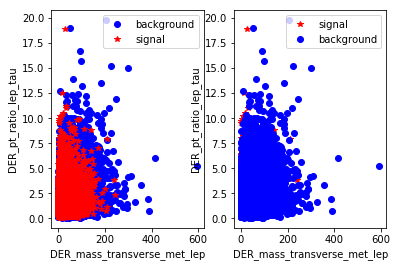

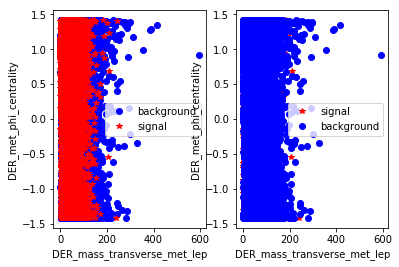

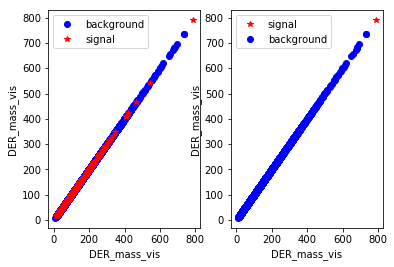

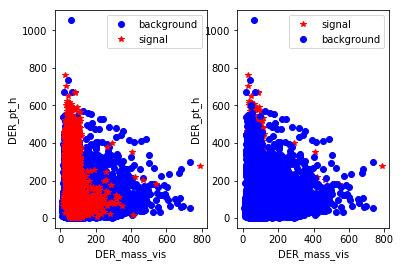

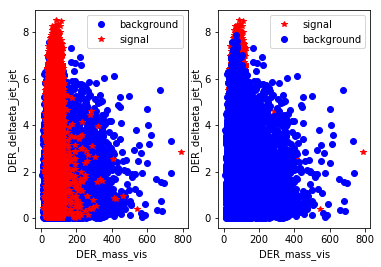

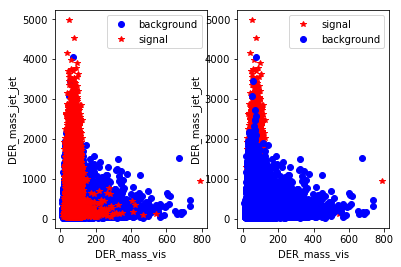

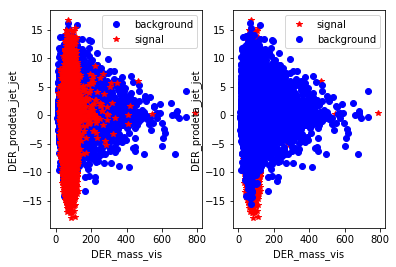

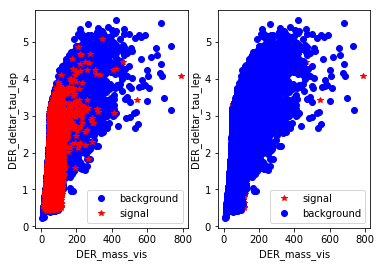

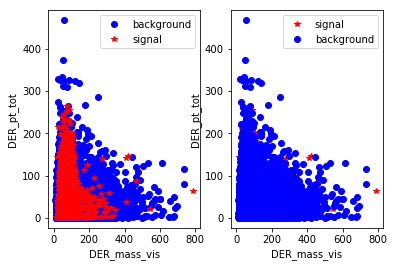

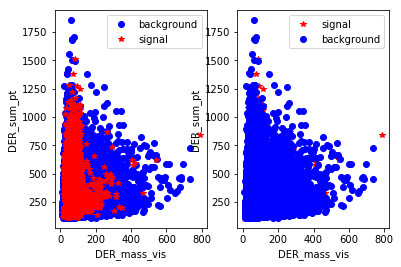

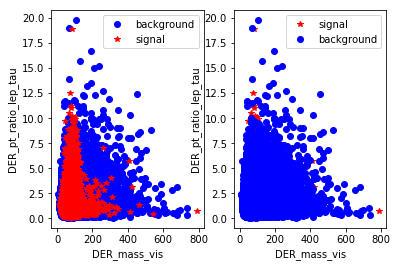

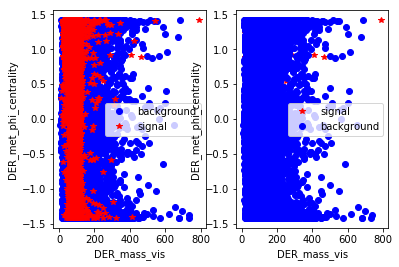

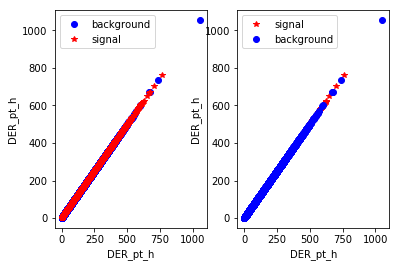

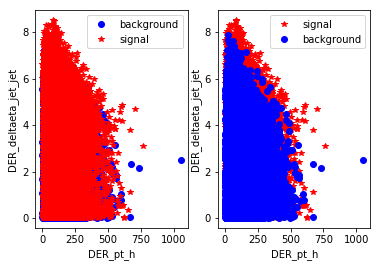

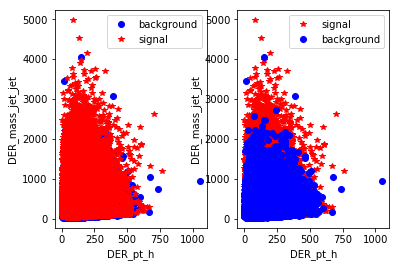

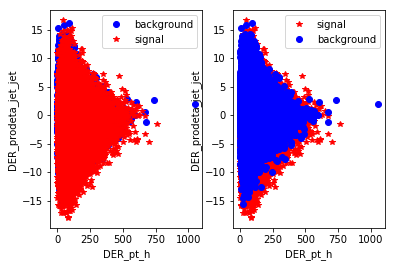

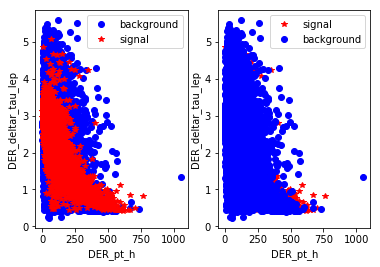

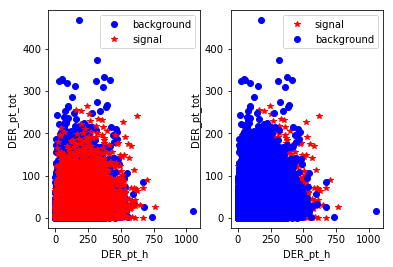

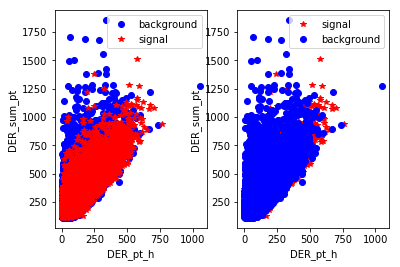

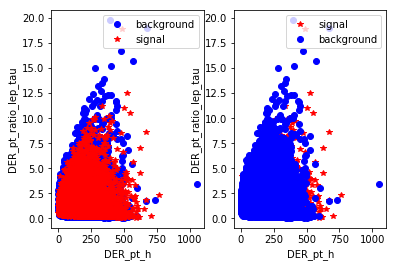

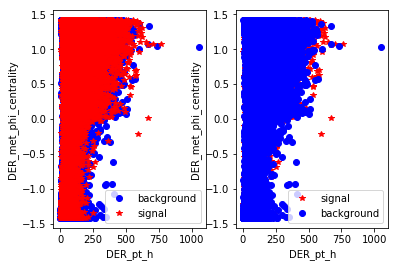

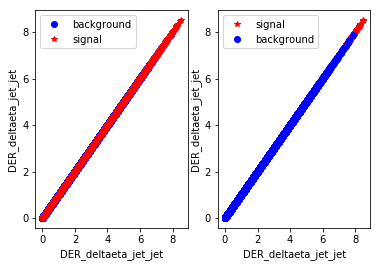

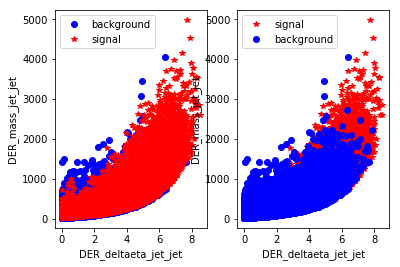

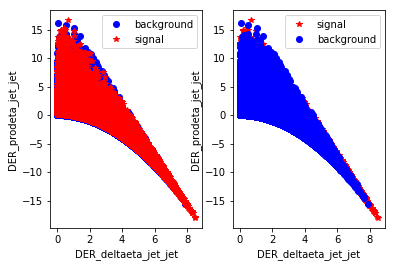

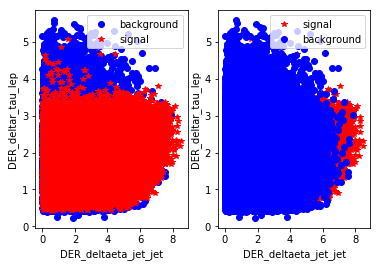

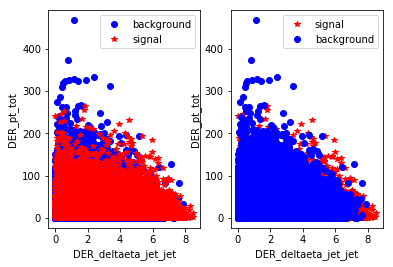

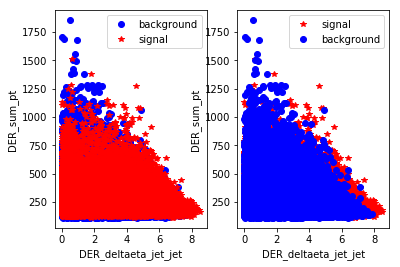

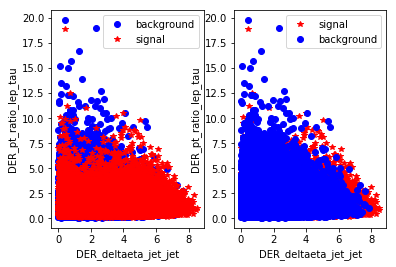

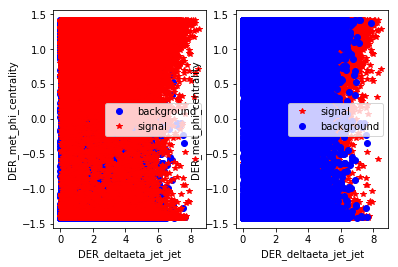

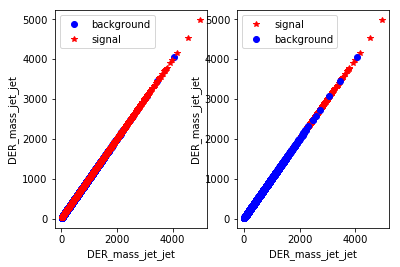

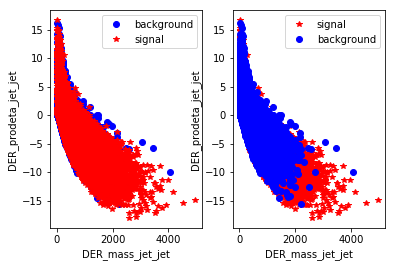

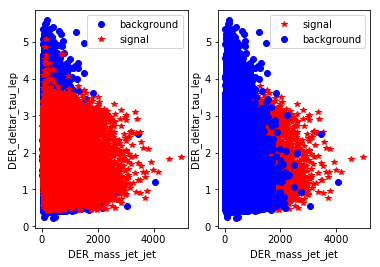

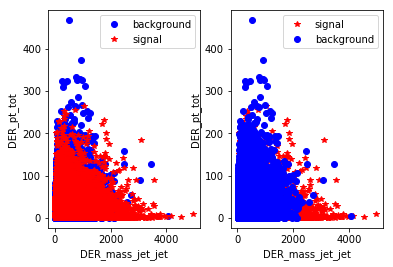

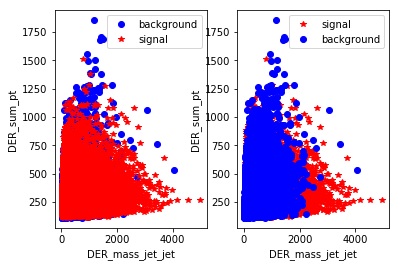

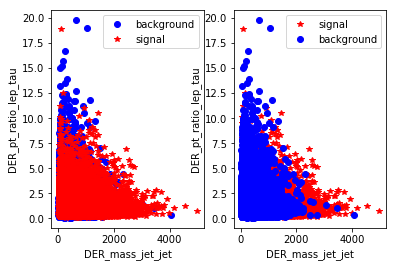

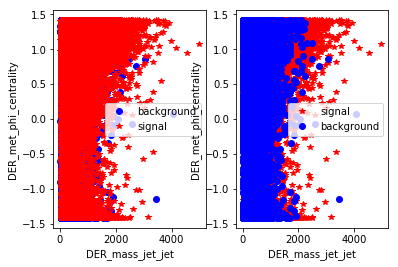

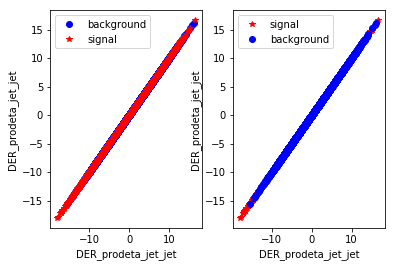

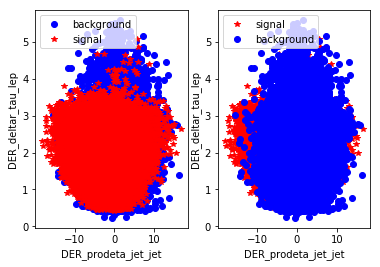

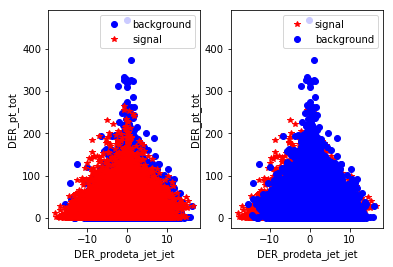

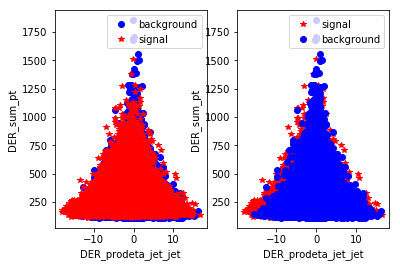

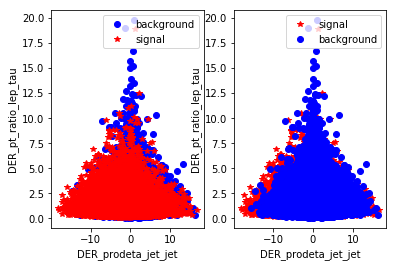

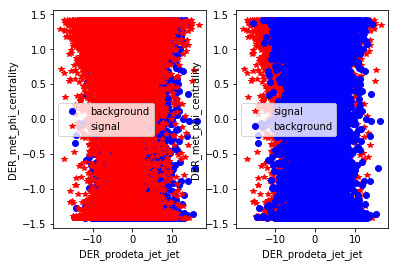

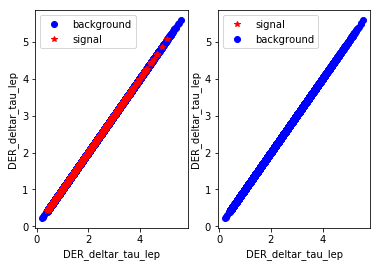

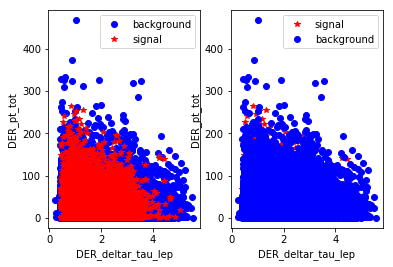

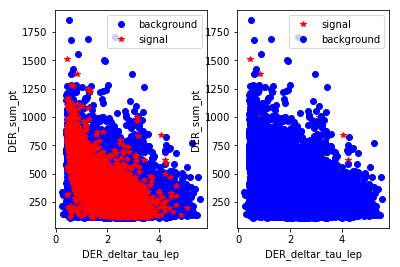

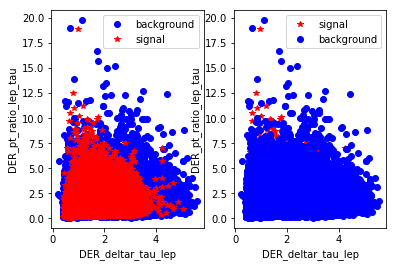

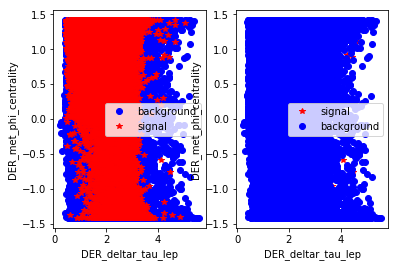

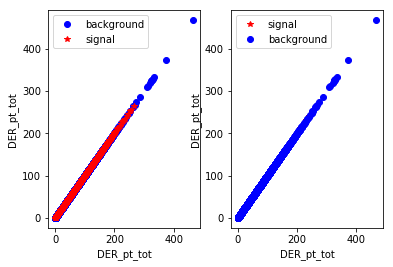

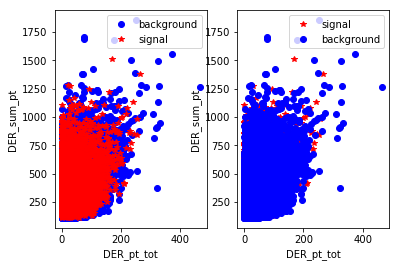

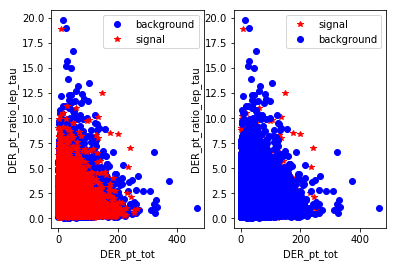

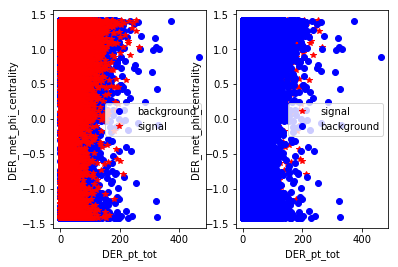

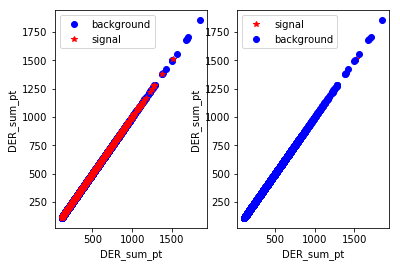

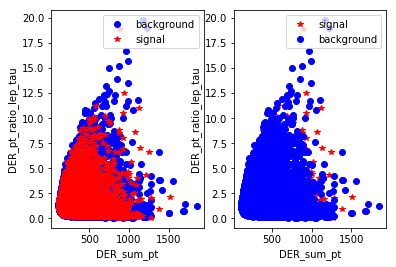

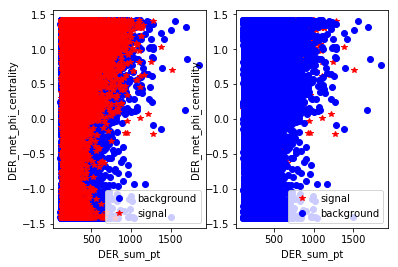

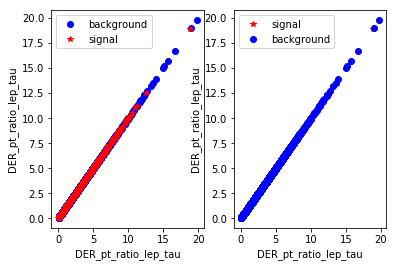

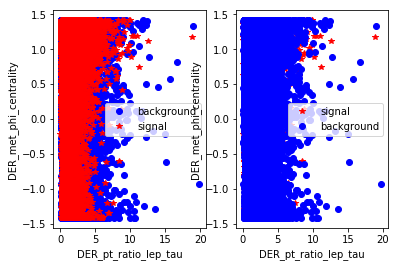

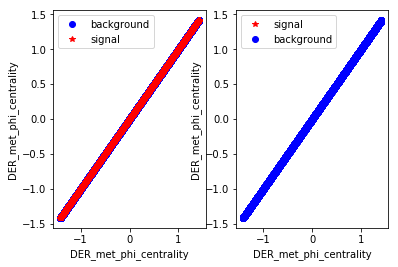

In [12]:
# read the names of the features in the dataset 'train.csv'
featureNames = np.genfromtxt(my_path + r'\data\train.csv', delimiter=",", dtype=str, max_rows = 1)[2:]
PriNames = featureNames[:13]

# plot all PRI feature spaces after removing the 999
for i in np.arange(x_pri.shape[1]-1):
    for j in range(i,x_pri.shape[1]-1):
        plotInFeatureSpace(x_pri, y_no_999, i, j, PriNames)

# Fisher information

In [ ]:
def getFisher(samples, labels):
    
    # get background events in samples (the label in 'labels' is -1)
    ind_background = np.where(labels == -1)
    samples_background = samples[ind_background]
    
    # get signal events in samples (the label in 'labels' is +1)
    ind_signal = np.where(labels == 1)
    samples_signal = samples[ind_signal]
    
    # calculate the Fisher information
    fisher = (np.mean(samples_background)- np.mean(samples_signal))**2 / (np.std(samples_background)- np.std(samples_signal))

# Least Square GD

In [23]:
# PRI and DER 
initial_w = np.zeros(X_no_999.shape[1])
max_iters = 500
gamma = 0.000001
#w_ls, loss_ls = least_squares_GD(y_no_999, X_no_999, initial_w, max_iters, gamma)

# DER
initial_w = np.zeros(x_der.shape[1])
max_iters = 500
gamma = 0.00001
w_ls, loss_ls = least_squares_GD(y_no_999, x_der, initial_w, max_iters, gamma)

(68109,)
(68109, 2)
[ 0.  0.]
Gradient Descent(9/9): loss MSE=0.4999973563379433, w0=1.6260062291235309e-06, w1=-1.2515065854022904e-08


# Least Square SGD

In [21]:
# PRI and DER 
initial_w = np.zeros(X_no_999.shape[1])
max_iters = 500
gamma = 0.000001
w_ls, loss_ls = least_squares_SGD(y_no_999, X_no_999, initial_w, max_iters, gamma)

# DER
initial_w = np.zeros(x_der.shape[1])
max_iters = 500
gamma = 0.00001

w_ls, loss_ls = least_squares_SGD(y_no_999, x_der, initial_w, max_iters, gamma)

Gradient Descent(499/499): loss MSE=1.103099596225925, w0=-0.0003815810007730835, w1=-0.002314638849754636
Gradient Descent(499/499): loss MSE=558887792.6928523, w0=36.10157261296971, w1=1.508332176384426
